<a href="https://colab.research.google.com/github/kodenshacho/ColaboratoryNotes/blob/main/%E9%96%A2%E6%95%B0%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
vector = [
    0, 6, 25, 20, 15, 8, 15, 6, 0, 6, 0, -5, -15, -3, 4, 10, 8, 13, 8, 10, 3,
    1, 20, 7, 3, 0 ]
import scipy.signal
print('Detect peaks without any filters.')
indexes = scipy.signal.find_peaks_cwt(vector, np.arange(1, 4),
    max_distances=np.arange(1, 4)*2)
indexes = np.array(indexes) - 1
print('Peaks are: %s' % (indexes))

Detect peaks without any filters.
Peaks are: [ 2  6  9 17 22]


In [ ]:

import numpy as np
vector = [
    0, 6, 25, 20, 15, 8, 15, 6, 0, 6, 0, -5, -15, -3, 4, 10, 8, 13, 8, 10, 3,
    1, 20, 7, 3, 0 ]
import scipy.signal
print('Detect peaks with order (distance) filter.')
indexes = scipy.signal.argrelextrema(
    np.array(vector),
    comparator=np.greater,order=2
)
print('Peaks are: %s' % (indexes[0]))

Detect peaks with order (distance) filter.
Peaks are: [ 2 17 22]


In [ ]:

import numpy as np
import scipy.signal
vector = np.array([0, 6, 25, 20, 15, 8, 15, 6, 0, 6, 0, -5, -15, -3, 4, 10, 8,
                   13, 8, 10, 3, 1, 20, 7, 3, 0])
print('Detect peaks with minimum height and distance filters.')
indexes, _ = scipy.signal.find_peaks(vector, height=7, distance=2.1)
print('Peaks are: %s' % (indexes))

Detect peaks with minimum height and distance filters.
Peaks are: [ 2  6 17 22]


In [ ]:
!pip install findpeaks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 1.5 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=5876d254d9d67db26a8f41c384e80db1779d08dbf8726dcd9b917f086b14435c
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
{'df':      x     y  labx  valley   peak
0    0     9   1.0    True  False
1    1    60   1.0   False  False
2    2   377   1.0   False  False
3    3   985   1.0   False  False
4    4  1153   1.0   False   True
5    5   672   1.0   False  False
6    6   501   2.0    True  False
7    7  1068   2.0   False  False
8    8  1110   2.0   False   True
9    9   574   2.0   False  False
10  10   135   2.0   False  False
11  11    23   2.0   False  False
12  12     3   3.0    True  False
13  13    47   3.0   False  False
14  14   252   3.0   False  False
15  15   812   3.0   False  False
16  16  1182   3.0   False   True
17  17   741   3.0   False  False
18  18   263   3.0   False  False
19  19    33   3.0    True  False}


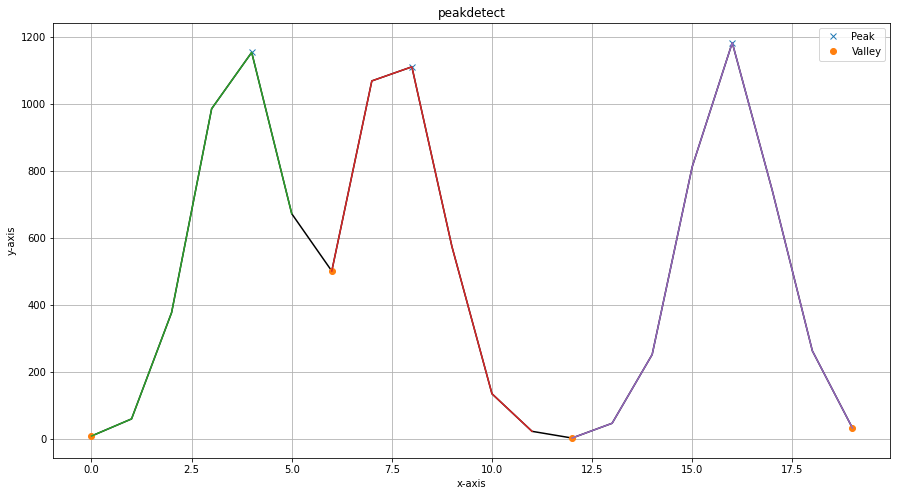

(None, <matplotlib.axes._subplots.AxesSubplot at 0x7fc24bde6cd0>)

In [ ]:
# Load library
from findpeaks import findpeaks
# Data
X = [9,60,377,985,1153,672,501,1068,1110,574,135,23,3,47,252,812,1182,741,263,33]
# Initialize
fp = findpeaks(lookahead=1)
results = fp.fit(X)
print(results)
# Plot
fp.plot()

In [ ]:
def plot_peaks(x, indexes, algorithm=None, mph=None, mpd=None):
    """Plot results of the peak dectection."""
    try:
        import matplotlib.pyplot as plt
    except ImportError as e:
        print('matplotlib is not available.', e)
        return
    _, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(x, 'b', lw=1)
    if indexes.size:
        label = 'peak'
        label = label + 's' if indexes.size > 1 else label
        ax.plot(indexes, x[indexes], '+', mfc=None, mec='r', mew=2, ms=8,
                label='%d %s' % (indexes.size, label))
        ax.legend(loc='best', framealpha=.5, numpoints=1)
    ax.set_xlim(-.02*x.size, x.size*1.02-1)
    ymin, ymax = x[np.isfinite(x)].min(), x[np.isfinite(x)].max()
    yrange = ymax - ymin if ymax > ymin else 1
    ax.set_ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
    ax.set_xlabel('Data #', fontsize=14)
    ax.set_ylabel('Amplitude', fontsize=14)
    ax.set_title('%s (mph=%s, mpd=%s)' % (algorithm, mph, mpd))
    plt.show()

Detect peaks without any filters (maxima).
Peaks are: [ 2  6  9 15 17 19 22]


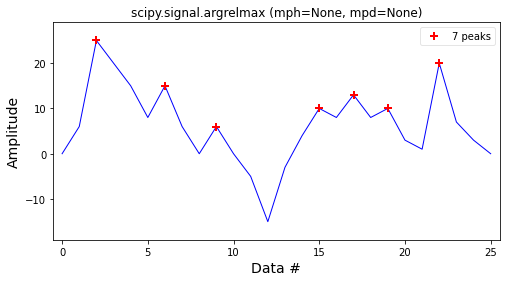

Detect peaks without any filters (minima).
Peaks are: [ 5  8 12 16 18 21]


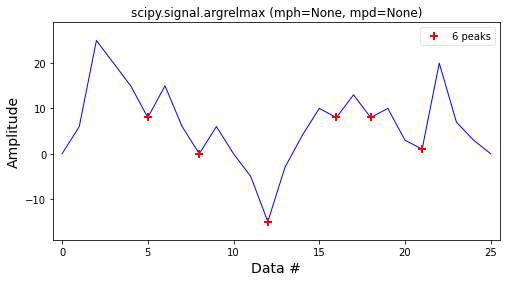

Detect peaks with order (distance) filter.
Peaks are: [ 2 17 22]


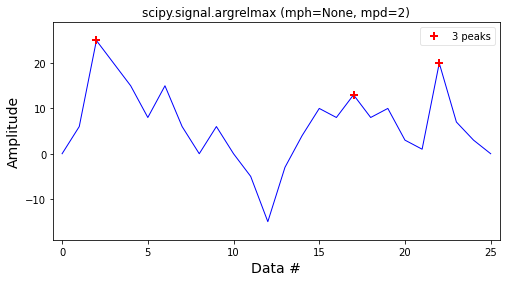

In [ ]:

import numpy as np
#from vector import vector, plot_peaks
import scipy.signal

vector = [    0, 6, 25, 20, 15, 8, 15, 6, 0, 6, 0, -5, -15, -3, 4, 10, 8, 13, 8, 10, 3,    1, 20, 7, 3, 0]
print('Detect peaks without any filters (maxima).')
indexes = scipy.signal.argrelextrema(
    np.array(vector),
    comparator=np.greater
)
print('Peaks are: %s' % (indexes[0]))
# To get number of peaks:
# print("{} peaks".format(len(indexes[0])))
plot_peaks(
    np.array(vector),
    indexes[0],
    algorithm='scipy.signal.argrelmax'
)

print('Detect peaks without any filters (minima).')
indexes = scipy.signal.argrelextrema(
    np.array(vector),
    comparator=np.less
)
print('Peaks are: %s' % (indexes[0]))
plot_peaks(
    np.array(vector),
    indexes[0],
    algorithm='scipy.signal.argrelmax'
)

print('Detect peaks with order (distance) filter.')
indexes = scipy.signal.argrelextrema(
    np.array(vector),
    comparator=np.greater,
    order=2
)
print('Peaks are: %s' % (indexes[0]))
plot_peaks(
    np.array(vector),
    indexes[0],
    mpd=2, algorithm='scipy.signal.argrelmax'
)

関数アルゴリズム

# scipy.signal.find_peaks_cwt


scipy.signal.find_peaks_cwt() は、信号から山の峰を見つけるための関数です。 この関数は、信号に対して小さな平滑化ウィンドウをスライドさせ、それぞれのウィンドウ内で信号の連続するセグメントを見つけます。 その後、それぞれのセグメントを比較して、最大の値を持つセグメントを山の峰として検出します。

詳細については、以下のような手順でアルゴリズムが実行されます。

１．指定された信号に対して、指定された幅のウィンドウをスライドさせます。

２．各ウィンドウ内の信号をスムージングするために、指定された平滑化関数を使用します。

３．スムージングされた信号の最大値を持つ位置を山の峰として検出します。

４．検出された山の峰のリストを返します。

scipy.signal.find_peaks_cwt() には、検出される山の峰の数を制限するためのパラメータが用意されています。 また、山の峰として検出されるために必要な最小の高さや、山の峰を検出するために使用される平滑化関数もカスタマイズできます。

# scipy.signal.argrelextrema


scipy.signal.argrelextremaは、NumPy配列内の相対的な极值のインデックスを見つけるための関数です。极值とは、データセット内の最大値や最小值のことを指します。

この関数には、2つの引数があります。最初の引数は、极值を探すデータセットを表すNumPy配列です。2番目の引数は、极值の種類を表す文字列です。この文字列は、'min'や'max'のいずれかを取ることができます。'min'を指定すると、データセット内の最小値を探します。'max'を指定すると、データセット内の最大値を探します。

この関数は、指定されたデータセット内で极值を探すために、次のようなアルゴリズムを使用します。

１．データセット内の各データポイントについて、その1つ前と1つ後のデータポイントと比較します。


２．データポイントがその1つ前より大きい場合、そのデータポイントは最大値の候補としてマークされます。データポイントがその1つ前より小さい場合、そのデータポイントは最小値の候補としてマークされます。


３．2番目の引数で指定された极值の種類に応じて、マークされたデータポイントの中から、最大値または最小値を選択します。


４．最大値または最小値が見つかった場合、そのインデックスを返します。

このアルゴリズムは、データセット内の极值を見つけるために、データセットを1つずつスキャンするため、間計算量は、O(n)です。これは、データセット内のデータポイント数がn個ある場合に、アルゴリズムが実行される回数を示しています。
また、このアルゴリズムは、データセット内のデータポイントが連続している場合にのみ正しく動作します。データセット内に欠損値がある場合や、データポイントが離散的に格納されている場合は、正しい結果を得ることができません。


scipy.signal.argrelextrema関数は、データセット内の相対的な极值を見つけるために使用されます。相対的な极值とは、データセット内でその近傍で最大または最小であるデータポイントのことを指します。このような极值は、データセット内の最大値や最小値ではないかもしれませんが、その近傍では最大または最小であるという意味で、相対的な极值と呼ばれます。


scipy.signal.argrelextrema関数は、このような相対的な极值を探すために、次のような手順を踏みます。

１．データセット内の各データポイントを、指定されたウィンドウサイズで囲むようにします。ウィンドウサイズは、関数の引数で指定されます。


２．各ウィンドウ内で、指定された极值の種類である最大値または最小値を見つけます。


３．各ウィンドウ内で見つかった极值のうち、最大値または最小値であるデータポイントのインデックスを返します。


このアルゴリズムでは、データセット内のデータポイントを、指定されたウィンドウサイズで囲むようにします。ウィンドウサイズは、関数の引数で指定されます。その後、各ウィンドウ内で、指定された极值の種類である最大値または最小値を見つけます。最後に、各ウィンドウ内で見つかった极值のうち、最大値または最小値であるデータポイントのインデックスを返します。

このアルゴリズムは、データセット内のデータポイントが離散的に格納されている場合や、欠損値がある場合でも、正しい結果を得ることができます。

# scipy.signal.find_peaks

scipy.signal.find_peaksは、信号処理においてピークを検出するための関数です。この関数では、次のようなアルゴリズムが用いられます。

１．ピークを定義する
ピークとは、信号のある位置で最大値をとることを意味します。ピークを検出するには、まず信号を検査する位置を定義する必要があります。これは、ピーク検出のパラメーターとして "distance" という引数を使用することで実現されます。この引数は、ピークを検出する際に考慮するサンプル数を指定します。例えば、distance=1 の場合、近傍の1サンプルを考慮してピークを検出します。

２．
ピークを検出する
次に、ピークを検出します。これは、信号から指定した位置を中心として、前後のサンプル値を比較して、その位置が最大値であるかどうかを判断することで実現されます。このとき、"prominence" というパラメーターを使用することで、ピークとして検出するために必要な最小の強度を指定することができます。

３．
ピークをフィルタリングする
最後に、検出されたピークをフィルタリングします。これは、"width" というパラメーターを使用して、ピークの幅を指定することで実現されます。例えば、width=1 の場合、幅が1サンプル未満のピークは除外されます。